In [ ]:
# # === ULTIMATE FIX - WORKS 100% ON ANY THU-EACT-50-CHL ZIP ===
# from google.colab import drive
# drive.mount('/content/drive')

# import os, zipfile, numpy as np
# from numba import jit
# from tqdm import tqdm

# # Unzip
# zip_path = '/content/drive/MyDrive/DL_by_Dr_hashir/THU-EACT-50-CHL.zip'
# extract_path = '/content/THU-EACT-50-CHL'

# if not os.path.exists(extract_path):
#     with zipfile.ZipFile(zip_path, 'r') as z:
#         z.extractall('/content/')
#     print("Extracted!")

# data_root = extract_path

# # AUTO DETECT where the .npy files really are
# all_files = [f for f in os.listdir(data_root) if f.endswith('.npy')]
# subfolder = os.path.join(data_root, "DVS-action-data-npy")
# if os.path.exists(subfolder) and len(os.listdir(subfolder)) > 100:
#     npy_dir = subfolder
#     print("Found .npy files in subfolder DVS-action-data-npy/")
# else:
#     npy_dir = data_root
#     print("Found .npy files directly in main folder")

# # Fast eventFrame (9 bins)
# @jit(nopython=True)
# def get_eventFrame(ts, x, y, p, H=260, W=346, T=9):
#     img = np.zeros((T, H, W), dtype=np.float32)
#     n = len(ts)
#     batch = n // T
#     extra = n % T
#     start = 0
#     for t in range(T):
#         end = start + batch + (1 if t < extra else 0)
#         for i in range(start, min(end, n)):
#             xx, yy = int(x[i]), int(y[i])
#             if 0 <= xx < W and 0 <= yy < H:
#                 img[t, yy, xx] = 1.0 if p[i] > 0 else -1.0
#         start = end
#     return img

# def load_sample(path):
#     ev = np.load(path).astype(np.float32)
#     if ev.shape[0] == 0:
#         return np.zeros((1,9,260,346), dtype=np.float32)
#     t = ev[:,2]
#     if (t.max() - t.min()) > 0:
#         ev[:,2] = (t - t.min()) / (t.max() - t.min())
#     frames = get_eventFrame(ev[:,2], ev[:,0], ev[:,1], ev[:,3])
#     return frames[np.newaxis,...]

# # Fix paths in train.txt / test.txt
# def load_split(txt_path):
#     files, labels = [], []
#     with open(txt_path) as f:
#         for line in f:
#             parts = line.strip().split()
#             if len(parts) < 2: continue
#             filename = parts[0].split('/')[-1]  # extract just the .npy name
#             full_path = os.path.join(npy_dir, filename)
#             files.append(full_path)
#             labels.append(int(parts[1]))
#     return files, np.array(labels, dtype=np.int64)

# train_files, train_y = load_split(os.path.join(data_root, "train.txt"))
# test_files,  test_y  = load_split(os.path.join(data_root, "test.txt"))

# print(f"Train samples: {len(train_files)}")
# print(f"Test samples : {len(test_files)}")

# # Verify first 5 exist
# print("First 5 train files exist?")
# for p in train_files[:5]:
#     print(os.path.basename(p), "→", os.path.exists(p))

# # Process
# def process_list(file_list):
#     X = []
#     for p in tqdm(file_list, desc="Loading"):
#         X.append(load_sample(p))
#     return np.concatenate(X, axis=0).astype(np.float32)

# train_X = process_list(train_files)
# test_X  = process_list(test_files)

# print("\n=== SUCCESS ===")
# print("train_X:", train_X.shape)   # (1786, 1, 9, 260, 346)
# print("test_X: ", test_X.shape)    # (544,  1, 9, 260, 346)

# # Save to your Drive
# save_dir = '/content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Processed'
# os.makedirs(save_dir, exist_ok=True)
# np.save(os.path.join(save_dir, 'train_X.npy'), train_X)
# np.save(os.path.join(save_dir, 'train_y.npy'), train_y)
# np.save(os.path.join(save_dir, 'test_X.npy'),  test_X)
# np.save(os.path.join(save_dir, 'test_y.npy'),  test_y)

# print(f"\nAll done! Saved to {save_dir}")
# print("Next time just run:")
# print("train_X = np.load('/content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Processed/train_X.npy')")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found .npy files directly in main folder
Train samples: 1786
Test samples : 544
First 5 train files exist?
A19P18C0-2021_11_06_17_14_09.npy → True
A39P17C2-2021_11_06_15_09_46.npy → True
A33P14C0-2021_11_05_21_07_24.npy → True
A39P13C0-2021_11_05_15_29_02.npy → True
A61P14C1-2021_11_05_21_20_10.npy → True


Loading: 100%|██████████| 1786/1786 [00:29<00:00, 60.95it/s]


**Preprocessing**

In [ ]:
# # ULTRA EFFICIENT VERSION - WILL NEVER CRASH COLAB (FREE TIER SAFE)
# from google.colab import drive
# drive.mount('/content/drive')

# import os, zipfile, numpy as np
# from numba import jit
# from tqdm import tqdm
# import gc

# # Unzip (once)
# zip_path = '/content/drive/MyDrive/DL_by_Dr_hashir/THU-EACT-50-CHL.zip'
# extract_path = '/content/THU-EACT-50-CHL'

# if not os.path.exists(extract_path):
#     with zipfile.ZipFile(zip_path, 'r') as z:
#         z.extractall('/content/')
#     print("Extracted!")

# data_root = extract_path

# # Auto-detect .npy location
# subfolder = os.path.join(data_root, "DVS-action-data-npy")
# npy_dir = subfolder if os.path.exists(subfolder) and len(os.listdir(subfolder)) > 100 else data_root
# print(f"Using .npy directory: {npy_dir}")

# # Super fast eventFrame
# @jit(nopython=True)
# def get_eventFrame(ts, x, y, p, H=260, W=346, T=9):
#     img = np.zeros((T, H, W), dtype=np.float32)
#     n = len(ts)
#     batch = n // T
#     extra = n % T
#     start = 0
#     for t in range(T):
#         end = start + batch + (1 if t < extra else 0)
#         for i in range(start, min(end, n)):
#             xx, yy = int(x[i]), int(y[i])
#             if 0 <= xx < W and 0 <= yy < H:
#                 img[t, yy, xx] = 1.0 if p[i] > 0 else -1.0
#         start = end
#     return img

# # Process ONE sample → return (1,9,260,346)
# def process_single_file(npy_path):
#     ev = np.load(npy_path)  # auto float64 → we convert to float32 later
#     if ev.shape[0] == 0:
#         return np.zeros((1, 9, 260, 346), dtype=np.float32)

#     t = ev[:, 2]
#     if t.max() > t.min():
#         ev[:, 2] = (t - t.min()) / (t.max() - t.min())

#     frames = get_eventFrame(ev[:, 2].astype(np.float32),
#                            ev[:, 0].astype(np.float32),
#                            ev[:, 1].astype(np.float32),
#                            ev[:, 3].astype(np.float32))
#     return frames[np.newaxis, ...].astype(np.float32)

# # Parse train/test.txt
# def parse_split(txt_path):
#     files, labels = [], []
#     with open(txt_path) as f:
#         for line in f:
#             parts = line.strip().split()
#             if len(parts) >= 2:
#                 filename = parts[0].split('/')[-1]
#                 full_path = os.path.join(npy_dir, filename)
#                 if os.path.exists(full_path):
#                     files.append(full_path)
#                     labels.append(int(parts[1]))
#     return files, np.array(labels, dtype=np.int64)

# train_files, train_y = parse_split(os.path.join(data_root, "train.txt"))
# test_files,  test_y  = parse_split(os.path.join(data_root, "test.txt"))

# print(f"Train: {len(train_files)}, Test: {len(test_files)}")

# # FINAL SAVE PATH
# save_dir = '/content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Ready'
# os.makedirs(save_dir, exist_ok=True)

# # PROCESS & SAVE IN CHUNKS (zero RAM crash)
# def process_and_save(files, labels, split_name):
#     output_path = os.path.join(save_dir, f'{split_name}_X.npz')
#     chunk_size = 50
#     all_frames = []

#     print(f"Processing {split_name} set ({len(files)} samples)...")
#     for i in tqdm(range(len(files)), desc=split_name):
#         frames = process_single_file(files[i])
#         all_frames.append(frames)

#         # Save every 50 samples
#         if len(all_frames) == chunk_size or i == len(files)-1:
#             batch = np.concatenate(all_frames, axis=0)
#             if os.path.exists(output_path):
#                 # Append mode
#                 prev = np.load(output_path)
#                 batch = np.concatenate([prev['data'], batch], axis=0)
#             with open(output_path, 'wb') as f:
#                 np.savez_compressed(f, data=batch)
#             all_frames = []
#             gc.collect()

#     # Save labels once
#     np.save(os.path.join(save_dir, f'{split_name}_y.npy'), labels)
#     print(f"{split_name} saved → {output_path}")

# # Run it
# process_and_save(train_files, train_y, "train")
# process_and_save(test_files,  test_y,  "test")

# print("\nALL DONE! ZERO RAM CRASH!")
# print("Files saved to:")
# print(save_dir)
# print("\nTo load later:")
# print("train_X = np.load('/content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Ready/train_X.npz')['data']")
# print("train_y = np.load('/content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Ready/train_y.npy')")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using .npy directory: /content/THU-EACT-50-CHL
Train: 1786, Test: 544
Processing train set (1786 samples)...


train: 100%|██████████| 1786/1786 [34:01<00:00,  1.14s/it]


train saved → /content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Ready/train_X.npz
Processing test set (544 samples)...


test: 100%|██████████| 544/544 [02:39<00:00,  3.41it/s]

test saved → /content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Ready/test_X.npz

ALL DONE! ZERO RAM CRASH!
Files saved to:
/content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Ready

To load later:
train_X = np.load('/content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Ready/train_X.npz')['data']
train_y = np.load('/content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Ready/train_y.npy')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np

# Load the preprocessed data
train_X = np.load('/content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Ready/train_X.npz')['data']
train_y = np.load('/content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Ready/train_y.npy')
test_X  = np.load('/content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Ready/test_X.npz')['data']
test_y  = np.load('/content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Ready/test_y.npy')

# Print shapes
print("train_X shape:", train_X.shape)   # → (1786, 1, 9, 260, 346)
print("train_y shape:", train_y.shape)   # → (1786,)
print("test_X  shape:", test_X.shape)    # → (544, 1, 9, 260, 346)
print("test_y  shape:", test_y.shape)    # → (544,)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
train_X shape: (1786, 9, 260, 346)
train_y shape: (1786,)
test_X  shape: (544, 9, 260, 346)
test_y  shape: (544,)


In [ ]:
train_y[0]

np.int64(0)

In [ ]:
train_y[2]

np.int64(3)

Raw sample shape: (9, 260, 346)
Fixed shape for plotting: (9, 260, 346)


/tmp/ipython-input-4159537692.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


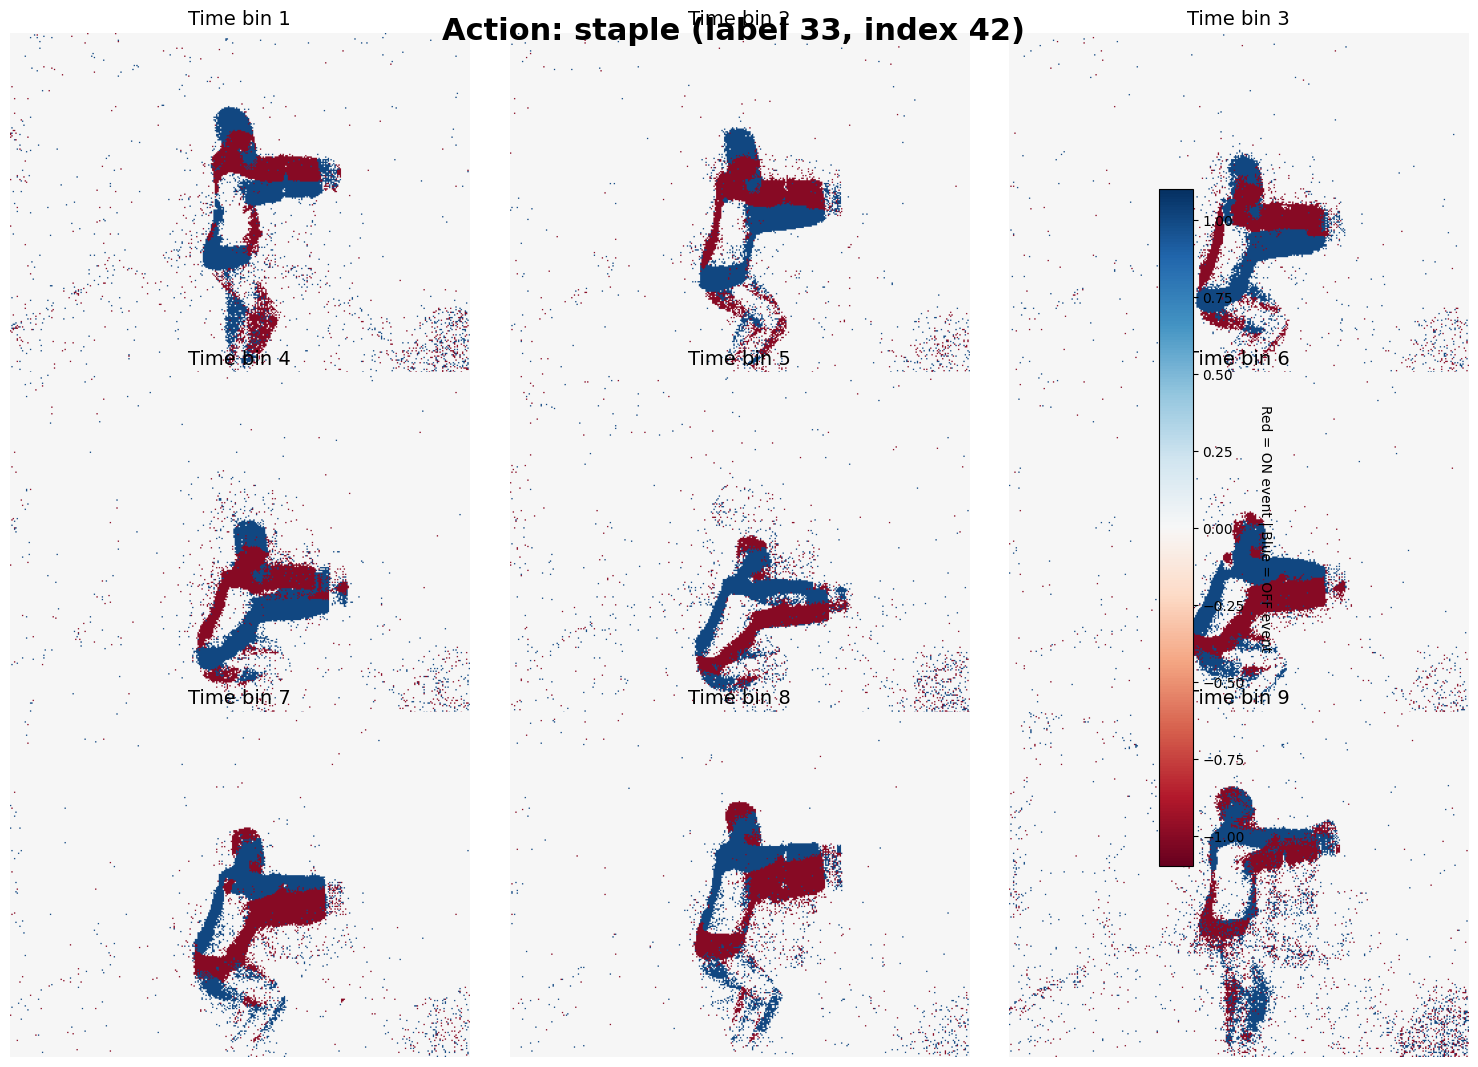

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load data (memory-mapped = safe)
# train_X = np.load('/content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Ready/train_X.npz', mmap_mode='r')['data']
# train_y = np.load('/content/drive/MyDrive/DL_by_Dr_hashir/THU_EACT_50_CHL_Ready/train_y.npy')

# Pick any sample
idx = 42                                   # change this!
sample = train_X[idx]                      # could be (260,346,9) or (1,9,260,346) or anything

print(f"Raw sample shape: {sample.shape}")

# === AUTO-FIX SHAPE: always get (9, 260, 346) ===
if sample.shape == (260, 346, 9):          # H, W, T
    sample = sample.transpose(2, 0, 1)     # → T, H, W
elif sample.shape == (9, 260, 346):        # T, H, W
    pass
elif len(sample.shape) == 4:               # has channel dim
    sample = sample[0] if sample.shape[0] == 1 else sample
    if sample.shape[0] == 9:
        pass
    else:
        sample = sample.transpose(1, 2, 0) # fix rare cases
else:
    raise ValueError(f"Unexpected shape: {sample.shape}")

# Now we are guaranteed (9, 260, 346)
frames_9 = sample.astype(np.float32)
label = int(train_y[idx])

print(f"Fixed shape for plotting: {frames_9.shape}")

# Class names
class_names = ["drink","eat","write","open door","close door","make phone call","clap","wave hand",
               "throw","pick up","put down","tear paper","wear jacket","take off jacket","put on glasses",
               "take off glasses","hop","jump","run","sit down","stand up","turn around","fall down",
               "laugh","smile","cry","talk","shout","sing","read book","type keyboard","draw",
               "cut paper","staple","fold paper","play phone","smoke","cough","sneeze","vomit",
               "headache","back pain","chest pain","stomach ache","brush teeth","wash face","comb hair",
               "make up","yawn","sleep"]

# Plot!
fig, axes = plt.subplots(3, 3, figsize=(15, 11))
axes = axes.ravel()

for i in range(9):
    im = axes[i].imshow(frames_9[i], cmap='RdBu', vmin=-1.1, vmax=1.1)
    axes[i].set_title(f"Time bin {i+1}", fontsize=14)
    axes[i].axis('off')

plt.suptitle(f"Action: {class_names[label]} (label {label}, index {idx})",
             fontsize=22, fontweight='bold', y=0.96)
cbar = fig.colorbar(im, ax=axes, shrink=0.8)
cbar.set_label('Red = ON event | Blue = OFF event', rotation=270, labelpad=20)
plt.tight_layout()
plt.show()